# *Aufgabe: Lineare Methoden*

0. Importieren Sie alle die nötigen Bibliotheken.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from matplotlib import cm


In [2]:
def mse(y_pred,y):
    return np.mean((y_pred-y)**2)

def plot_original_data(ax, x, y):
    ax.scatter(x[np.argwhere(y>=50)].ravel(),y[np.argwhere(y>=50)].ravel(),c="green",label="Bestanden")
    ax.scatter(x[np.argwhere(y<50)].ravel(),y[np.argwhere(y<50)].ravel(),c="red",label="Nicht bestanden")


### Aufgabe 1. Lineare Regression per Hand

1. Kopieren und visualisieren Sie (am besten mit scatter) die Daten:

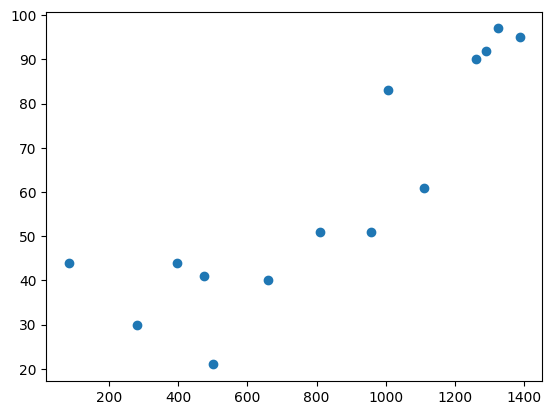

In [3]:
studying = np.array([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290])
result = np.array([44,97,30,51,95,51,44,41,21,40,90,83,61,92])

plt.scatter(studying, result)


2. Definieren Sie Vektoren mit Gewichten und Bias Werten und berechnen Sie die lineare Regression sowie den Fehler. Visualisieren Sie Ihr Ergebnis.

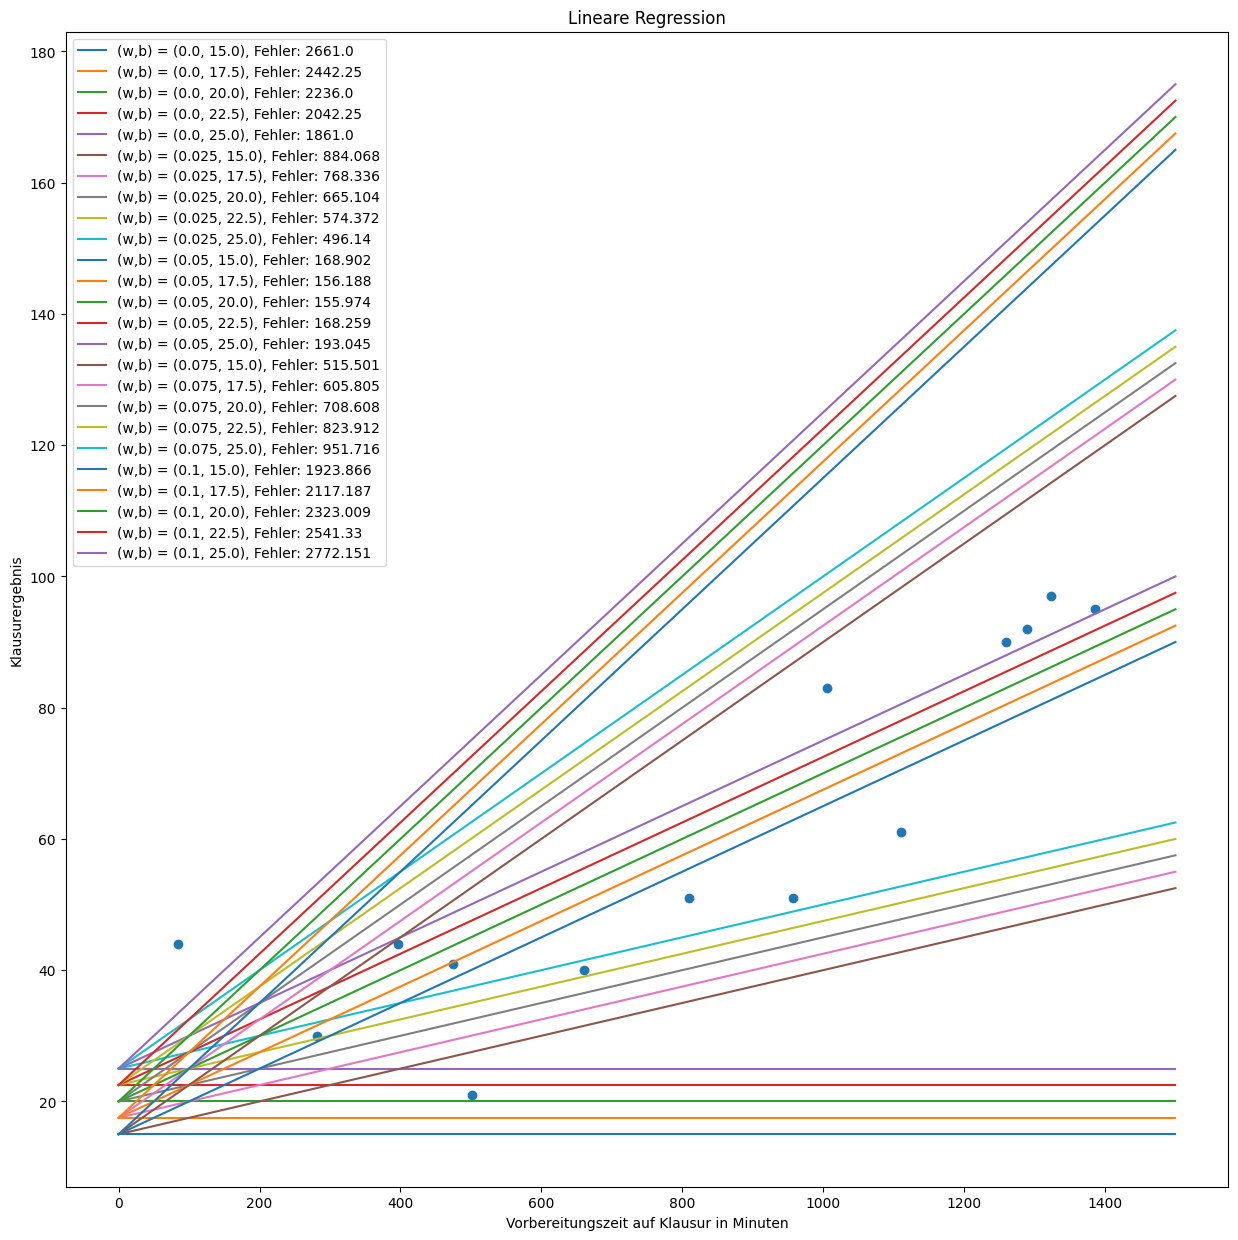

In [4]:
ws = np.linspace(0, 0.1, 5)
bs = np.linspace(15,25, 5)
combinations = np.array([[w, b] for w in ws for b in bs])
x_axis = np.linspace(0, 1500)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.scatter(studying, result)
ax.set_title("Lineare Regression")
ax.set_xlabel("Vorbereitungszeit auf Klausur in Minuten")
ax.set_ylabel("Klausurergebnis")

for wb in combinations:
    w, b = wb[0], wb[1]
    prediction = w * studying + b
    error = mse(prediction, result)
    ax.plot(x_axis, w * x_axis + b, label="(w,b) = ({}, {}), Fehler: {}".format(round(w,3),b, round(error,3)))
ax.legend()


### Aufgabe 2. Polynomiale Regression

1. Implementieren Sie polinomiale Modelle (grad von 1 bis 7) für die Regressionsaufgabe. Visualisieren Sie alle Modelle auf einem Graphen. Vergleichen Sie auch den Fehler. 

x_poly:  [[1.000e+00 8.400e+01]
 [1.000e+00 1.323e+03]
 [1.000e+00 2.820e+02]
 [1.000e+00 9.570e+02]
 [1.000e+00 1.386e+03]
 [1.000e+00 8.100e+02]
 [1.000e+00 3.960e+02]
 [1.000e+00 4.740e+02]
 [1.000e+00 5.010e+02]
 [1.000e+00 6.600e+02]
 [1.000e+00 1.260e+03]
 [1.000e+00 1.005e+03]
 [1.000e+00 1.110e+03]
 [1.000e+00 1.290e+03]]
x_poly:  [[1.000000e+00 8.400000e+01 7.056000e+03]
 [1.000000e+00 1.323000e+03 1.750329e+06]
 [1.000000e+00 2.820000e+02 7.952400e+04]
 [1.000000e+00 9.570000e+02 9.158490e+05]
 [1.000000e+00 1.386000e+03 1.920996e+06]
 [1.000000e+00 8.100000e+02 6.561000e+05]
 [1.000000e+00 3.960000e+02 1.568160e+05]
 [1.000000e+00 4.740000e+02 2.246760e+05]
 [1.000000e+00 5.010000e+02 2.510010e+05]
 [1.000000e+00 6.600000e+02 4.356000e+05]
 [1.000000e+00 1.260000e+03 1.587600e+06]
 [1.000000e+00 1.005000e+03 1.010025e+06]
 [1.000000e+00 1.110000e+03 1.232100e+06]
 [1.000000e+00 1.290000e+03 1.664100e+06]]
x_poly:  [[1.00000000e+00 8.40000000e+01 7.05600000e+03 5.92704000e+05

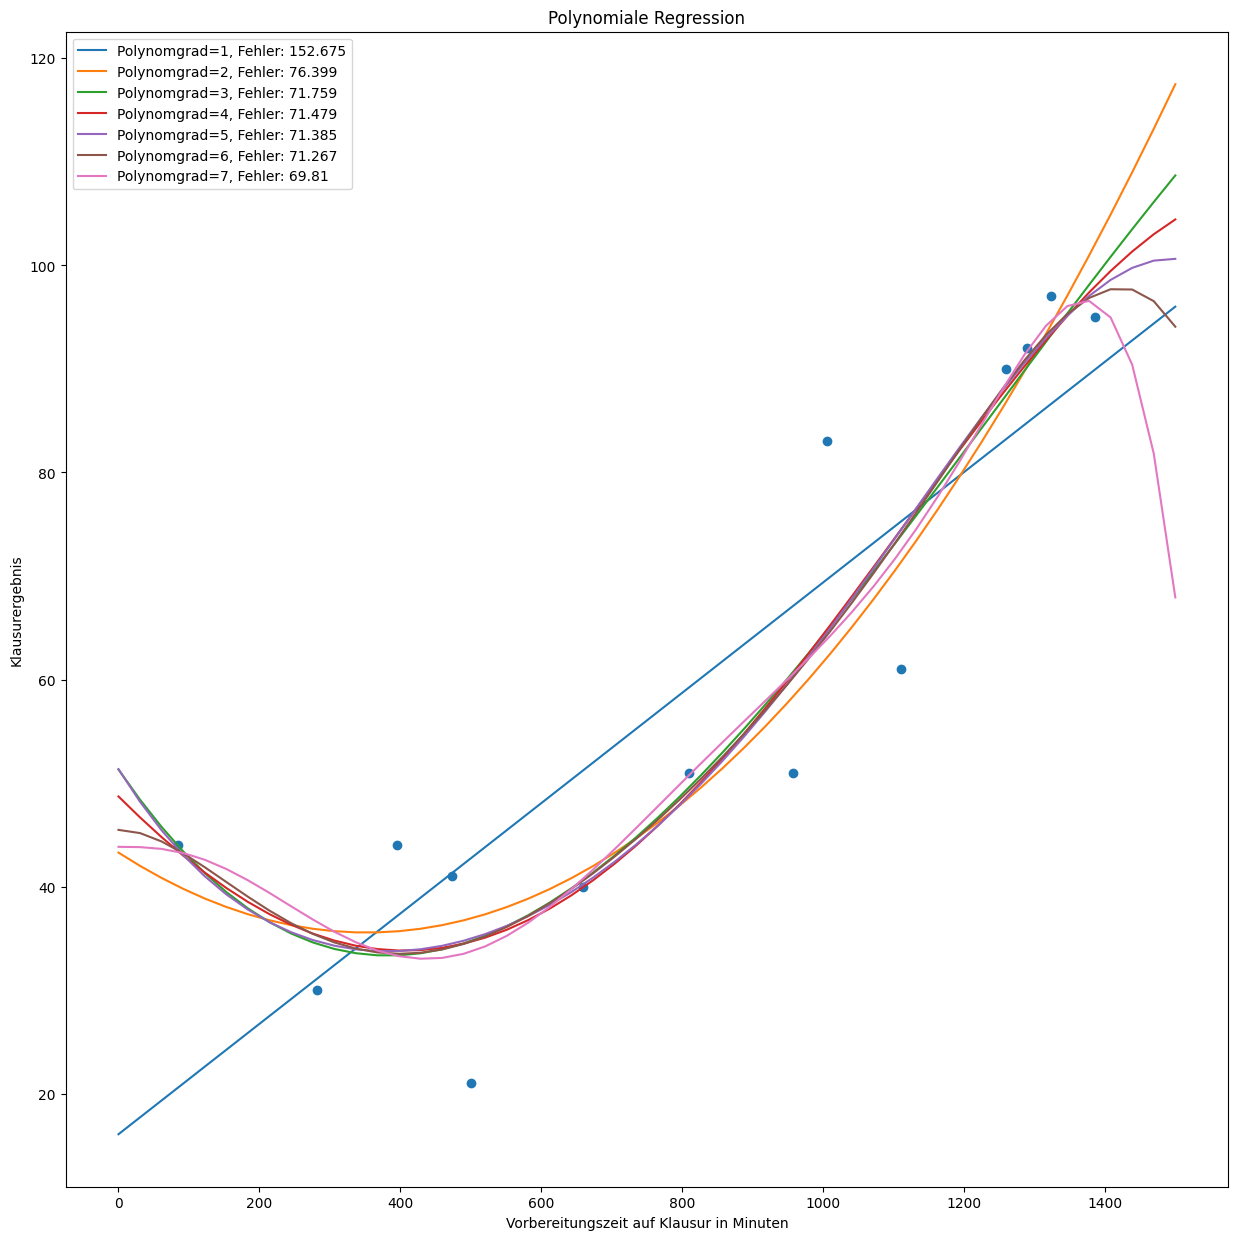

In [5]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.scatter(studying, result)
ax.set_title("Polynomiale Regression")
ax.set_xlabel("Vorbereitungszeit auf Klausur in Minuten")
ax.set_ylabel("Klausurergebnis")

for i in range(1, 8):
    poly = PolynomialFeatures(i)
    x_poly = poly.fit_transform(studying.reshape(-1, 1))
    print("x_poly: ", x_poly)
    model = LinearRegression()
    model.fit(x_poly,result)
    #prediction = model.predict(poly.transform(studying.reshape(-1, 1)))
    prediction = model.predict(x_poly)
    error = mse(prediction, result)

    predicted_plot = model.predict(poly.transform(x_axis.reshape(-1, 1)))
    ax.plot(x_axis, predicted_plot, label="Polynomgrad={}, Fehler: {}".format(i, round(error,3)))

ax.legend()


In [6]:
PolynomialFeatures?


Init signature:
PolynomialFeatures(
    degree=2,
    *,
    interaction_only=False,
    include_bias=True,
    order='C',
)
Docstring:     
Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form
[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

Read more in the :ref:`User Guide <polynomial_features>`.

Parameters
----------
degree : int or tuple (min_degree, max_degree), default=2
    If a single int is given, it specifies the maximal degree of the
    polynomial features. If a tuple `(min_degree, max_degree)` is passed,
    then `min_degree` is the minimum and `max_degree` is the maximum
    polynomial degree of the generated features. Note that `min_degree=0`
    and `min_degree=1` are equivalent as outputting the degree zero term is
    determined by `include_bi

2. Binarisieren Sie den result Vektor und implementieren Sie die Logistischer Regression für die Klassifikationsaufgabe. 

Genauigkeit für Polynomgrad 1: 100.0 Prozent.
Genauigkeit für Polynomgrad 2: 100.0 Prozent.
Genauigkeit für Polynomgrad 3: 100.0 Prozent.
Genauigkeit für Polynomgrad 4: 42.857142857142854 Prozent.
Genauigkeit für Polynomgrad 5: 42.857142857142854 Prozent.
Genauigkeit für Polynomgrad 6: 42.857142857142854 Prozent.
Genauigkeit für Polynomgrad 7: 42.857142857142854 Prozent.


/Users/matthiasbandorf/wb/git-repos/ml-tutorial/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/matthiasbandorf/wb/git-repos/ml-tutorial/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

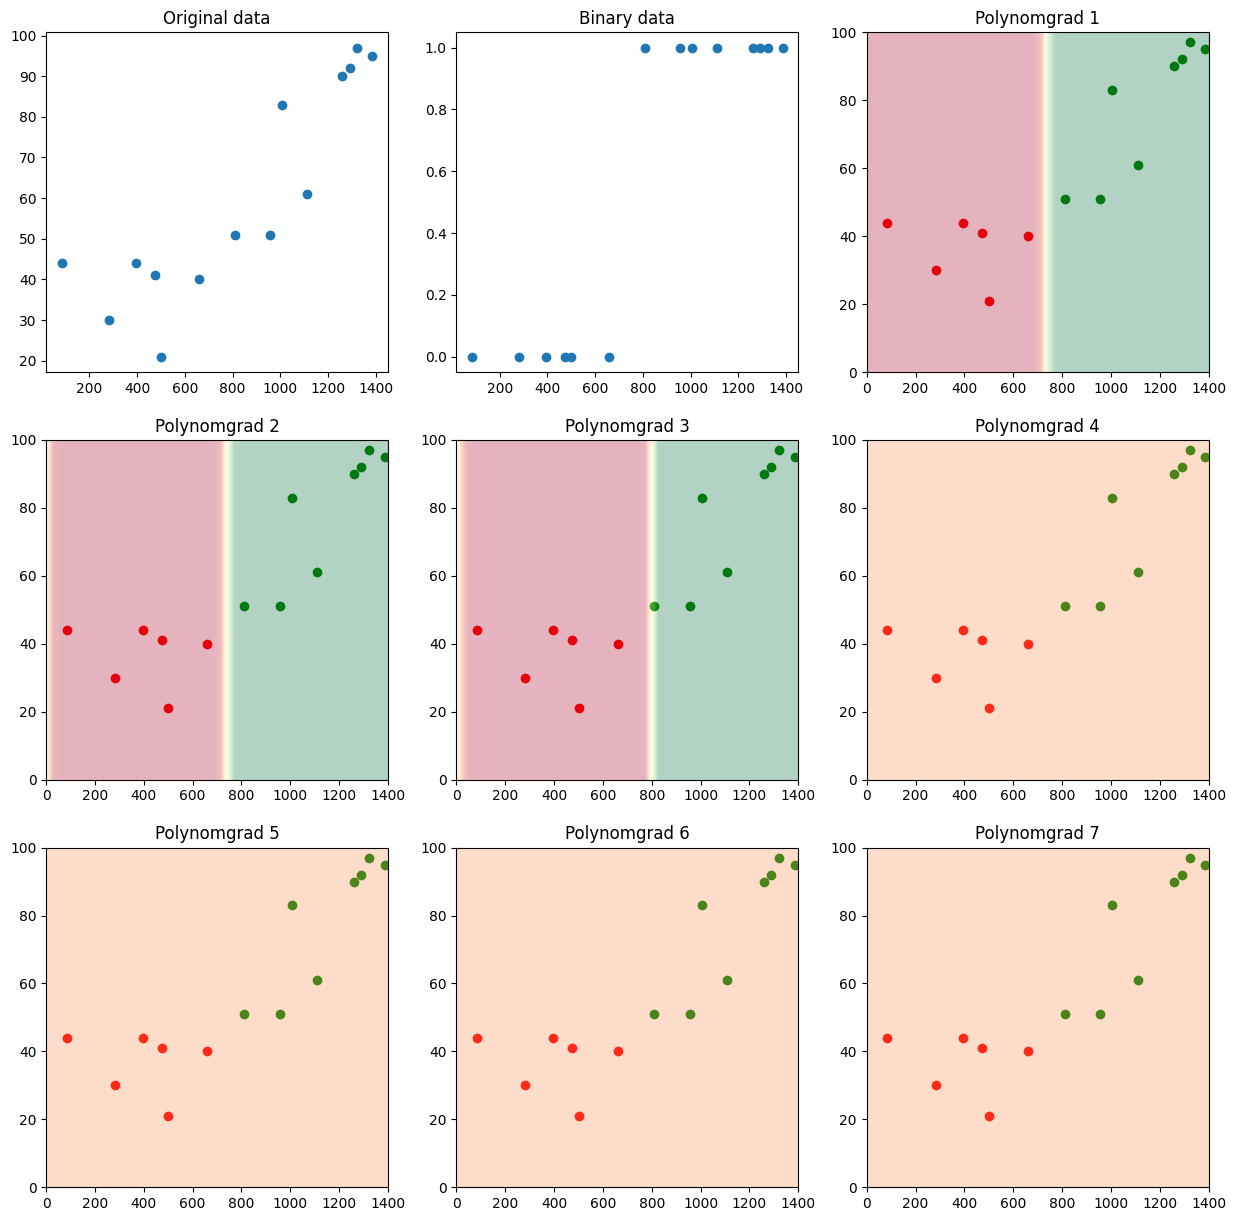

In [7]:
studying = np.array([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290])
result = np.array([44,97,30,51,95,51,44,41,21,40,90,83,61,92])
result_binary = np.array([1 if i >= 50 else 0 for i in result])

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(3, 3, 1)
ax.set_title("Original data")
ax.scatter(studying, result)
ax = fig.add_subplot(3, 3, 2)
ax.set_title("Binary data")
ax.scatter(studying, result_binary)

for i in range(1, 8):

    # Plot the original data
    ax = fig.add_subplot(3, 3, i+2)
    ax.set_title("Polynomgrad {}".format(i))
    plot_original_data(ax, studying, result)

    # Train the model
    poly = PolynomialFeatures(i)
    x_poly = poly.fit_transform(studying.reshape(-1, 1))
    model = LogisticRegression()
    model.fit(x_poly, result_binary)

    # Predict the studying
    predicted = model.predict(poly.transform(studying.reshape(-1, 1)))
    score = model.score(x_poly, result_binary)
    print("Genauigkeit für Polynomgrad {}: {} Prozent.".format(i,score*100))

    # Visualise the model

    x_axis, y_axis = np.linspace(0, 1400), np.linspace(0, 100)
    x1, x2 = np.meshgrid(x_axis, y_axis)

    z = np.array([model.predict_proba(poly.transform(x_axis.reshape(-1, 1))).T[1] for y in y_axis])

    ax.contourf(x1,x2,z.reshape(50,50),cmap=cm.RdYlGn,levels=50,alpha=0.3)
